# L1 : Q3

![](../questoes/q3.png "")

### Fix the notebook path for this project

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

### Imports

In [2]:
import numpy as np
from neuralnetworks.neuralnetwork import NeuralNetwork
from datasets.l1q3 import createDataSetL1Q3A, createDataSetL1Q3B
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

### Set a random seed

In [3]:
SEED = 42
np.random.seed(seed=SEED)

## A

### Create the dataset

In [4]:
X, y = createDataSetL1Q3A(1000)

### Split into train and test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### Lets check some training set rows

In [6]:
print("X: ", X_train[:5], "\n\nY: ", y_train[:5])

X:  [[0, 0], [0, 1], [1, 1], [0, 0], [1, 0]] 

Y:  [[0], [1], [0], [0], [1]]


### Solution: MLP (2 layers) (momentum 0.1)

TRAINING DETAILS:


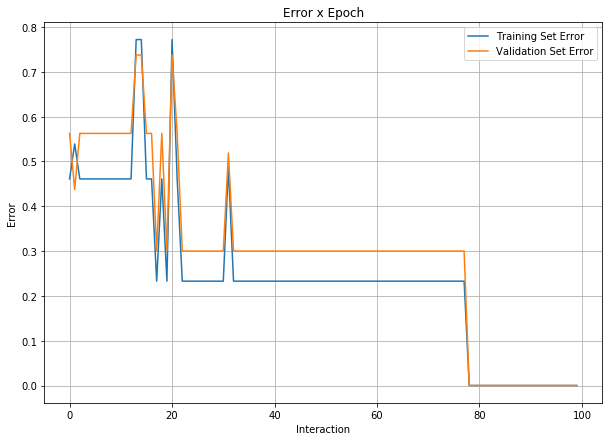

NETWORK STATE AFTER TRAINING:
 {'activation': 'sigmoid',
 'activation_last_layer': 'linear',
 'architecture': [2,
                  1],
 'autoEncode': False,
 'inputs': 2,
 'isClassification': True,
 'layers': [[{'activation': 'sigmoid', 'bias': 0.10946823791281482, 'inputs': 2, 'newBias': 0.10946823791281482, 'newWeights': array([-1.25007844, -1.19681161]), 'weights': array([-1.25007844, -1.19681161])},
             {'activation': 'sigmoid', 'bias': 0.017323955348783365, 'inputs': 2, 'newBias': 0.017323955348783365, 'newWeights': array([-3.9145824 , -3.78669059]), 'weights': array([-3.9145824 , -3.78669059])}],
            [{'activation': 'linear', 'bias': 0.087700467329547352, 'inputs': 2, 'newBias': 0.087700467329547352, 'newWeights': array([ 3.24397922, -3.4232617 ]), 'weights': array([ 3.24397922, -3.4232617 ])}]],
 'lr': 0.01,
 'momentum': 0.1,
 'seed': 42} 

TEST DATASET PREDICTIONS: 
y_test_true:  [0 0 0 1 1 1 0 1 1 0 0 0 0 1 1]  (first 15) 
y_test_pred:  [0 0 0 1 1 1 0 1 1 0 0

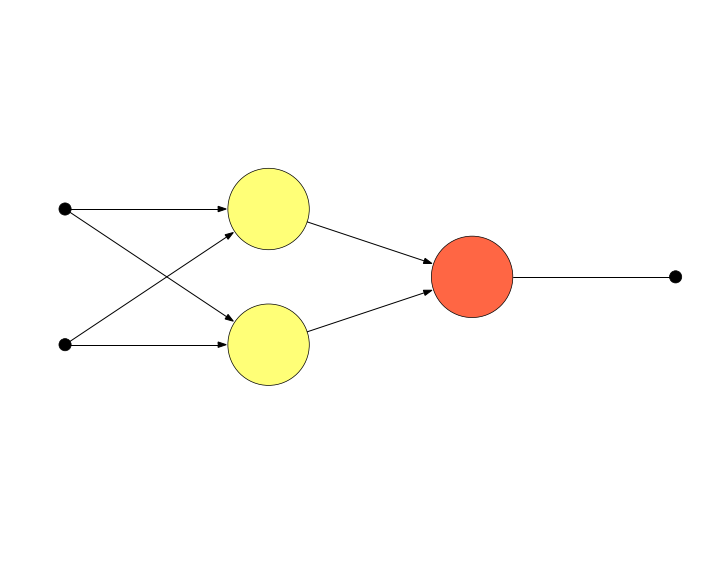

In [7]:
model = NeuralNetwork(2, [2, 1], isClassification=True, lr=0.01, autoEncode=False, activation='sigmoid',
                      activation_last_layer='linear', seed=SEED, momentum=0.1)

print("TRAINING DETAILS:")
model.fit(X=X_train, y=y_train, epochs=100, verbose=False, plot=True)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))

## B

### Create the dataset

In [8]:
X, y = createDataSetL1Q3B(1000)

### Split into train and test dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, shuffle=True)

### Lets check some training set rows

In [10]:
print("X: ", X_train[:5], "\n\nY: ", y_train[:5])

X:  [[0.11612582582582581], [2.1421467867867867], [2.782785825825826], [2.2302346546546548], [3.347348978978979]] 

Y:  [[0.97796487201897653], [0.064173534876228316], [0.072137818475416657], [0.094464528197977848], [-0.084366113749885521]]


### Solution: MLP (2 layers) (batch_size: FULL)

TRAINING DETAILS:


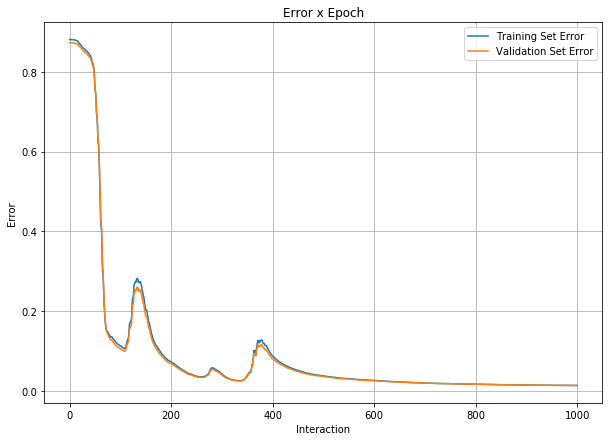

NETWORK STATE AFTER TRAINING:
 {'activation': 'tanh',
 'activation_last_layer': 'tanh',
 'architecture': [8,
                  1],
 'autoEncode': False,
 'inputs': 1,
 'isClassification': False,
 'layers': [[{'activation': 'tanh', 'bias': 0.13846316426235561, 'inputs': 1, 'newBias': 0.13846316426235561, 'newWeights': array([-1.64386534]), 'weights': array([-1.64386534])},
             {'activation': 'tanh', 'bias': 0.12323108903241893, 'inputs': 1, 'newBias': 0.12323108903241893, 'newWeights': array([-1.23098198]), 'weights': array([-1.23098198])},
             {'activation': 'tanh', 'bias': 0.12519673709387802, 'inputs': 1, 'newBias': 0.12519673709387802, 'newWeights': array([-1.40546829]), 'weights': array([-1.40546829])},
             {'activation': 'tanh', 'bias': 0.129317904374672, 'inputs': 1, 'newBias': 0.129317904374672, 'newWeights': array([-1.47846927]), 'weights': array([-1.47846927])},
             {'activation': 'tanh', 'bias': 0.14591078720796333, 'inputs': 1, 'newBias': 

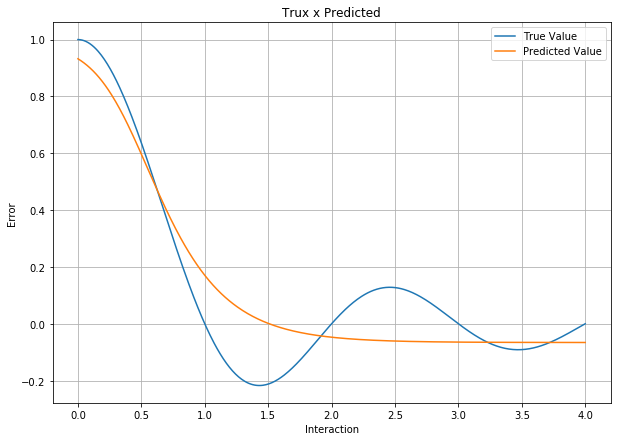

NETWORK ARCHITECTURE:


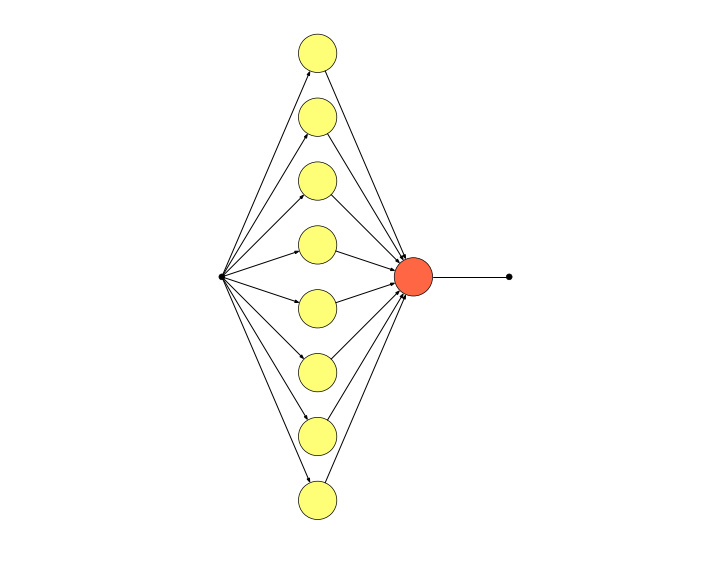

In [11]:
model = NeuralNetwork(1, [8, 1], isClassification=False, lr=0.05, autoEncode=False, activation='tanh',
                      activation_last_layer='tanh', seed=SEED)

print("TRAINING DETAILS:")
model.fit(X=X_train, y=y_train, epochs=1000, verbose=False, plot=True, batch_size=0)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))
y_train_true = np.reshape(y_train, (len(y_train)))
y_train_pred = np.reshape(model.predict(X_train), (len(X_train)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("MSE TRAINING DATASET:\n", mean_absolute_error(y_train_true, y_train_pred), "\n")
print("MSE TEST DATASET:\n", mean_absolute_error(y_test_true, y_test_pred), "\n")

print("PREDICTION CHART:")

X_sequence, y_sequence = createDataSetL1Q3B(500)
X_sequence_reshaped = np.reshape(X_sequence, (len(X_sequence)))
y_sequence_true = np.reshape(y_sequence, (len(y_sequence)))
y_sequence_pred = np.reshape(model.predict(X_sequence), (len(y_sequence)))

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(X_sequence_reshaped, y_sequence_true, label="True Value")
ax.plot(X_sequence_reshaped, y_sequence_pred, label="Predicted Value")
ax.set(xlabel='Interaction', ylabel='Error', title='Trux x Predicted')
ax.legend()
ax.grid()
plt.show()

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))